# Burgersova rovnice

Nechť $u \in \mathbb C^1( \mathbb R^2 \to \mathbb R)$ a $f(u) = \frac{1}{2} u^2$. Potom rovnici
\begin{equation}
  \frac{\partial u(x,t)}{\partial t} + \frac{\partial f(u(x,t))}{\partial x} = 0
\end{equation}
nazveme **nelineární Burgersovou rovnicí**.

Poznámka: pro $u\in \mathbb C^1$ lze rovnici upravit do tvaru
$$
    u_t + u u_x = 0.
$$

## Počáteční úloha pro rovnici lineární advekce

Nechť $u_0 \in \mathbb C^1(\mathbb R \to \mathbb R)$. **Počáteční úlohou** pro Burgersovu rovnici pak rozumíme nalézt funkci $u \in \mathbb C^1( \mathbb R\times [0,+\infty) \to \mathbb R)$ takovou, že $\forall x \in \mathbb R, \forall t>0$ je splněna rovnice 
\begin{equation}
  \frac{\partial u(x,t)}{\partial t} + \frac{\partial f(u(x,t))}{\partial x} = 0
\end{equation}
a navíc je $u(x,0)=u_0(x)$.


### Analytické řešení počáteční úlohy
Analytické řešení je možné získat například pomocí metody charakteristik. Řešení získáme v implicitním tvaru jako

$$
    u(x,t) = u_0(x - u(x,t) t).
$$

### Vznik nespojitosti
Klasické řešení existuje jen pro $t < t_{crit} = -1 / \min u_0'$, viz metoda charakteristik. 

### Slabé řešení
Nechť $\phi \in \mathbb C^1( \mathbb R\times [0,+\infty) \to \mathbb R)$ nenulová na kompaktní množině. Potom

$$
    \int_0^{+\infty}\int_{-\infty}^{+\infty}\left( u_t + f(u)_x\right) \phi(x,t) \,dx\,dt = 0.
$$

Integrál rozdělíme na součet dvou sčítanců a integrujeme zvlášť pomocí metody per-partes

$$
    \int_0^{+\infty}\int_{-\infty}^{+\infty} u_t \phi \,dx\,dt = 
    \int_{-\infty}^{+\infty} \left( \left[u \phi\right]_0^{+\infty}-
    \int_0^{+\infty} u \phi_t \,dt
    \right) \,dx
$$

a

$$
    \int_0^{+\infty}\int_{-\infty}^{+\infty} f(u)_x \phi \,dx\,dt = 
    \int_0^{+\infty} \left( \left[f(u) \phi\right]_{-\infty}^{+\infty}-
    \int_{-\infty}^{+\infty} f(u) \phi_x \,dx
    \right) \,dt.
$$

Protože $\phi=0$ pro $t\to+\infty$ a $|x|\to+\infty$ a $u(x,0)=u_0(x)$, je 

\begin{equation}
    \int_0^{+\infty}\int_{-\infty}^{+\infty}\left( u \phi_t + f(u)\phi_x\right) \phi(x,t) \,dx\,dt = 
    - \int_{-\infty}^{+\infty} u_0(x)\phi(x,0)\,dx.
\end{equation}

Funkci $u \in \mathbb L^\infty( \mathbb R\times [0,+\infty) \to \mathbb R)$ nazveme *slabým řešením* počáteční úlohy pro nelinearní (Burgersovu) rovnici, pokud $\forall \phi \in \mathbb C^1( \mathbb R\times [0,+\infty) \to \mathbb R)$ nenulové na kompaktní množině platí posledně uvedený vztah.  

### Numerické řešení počáteční úlohy pro Burgersovu rovnici metodou konečných objemů

In [1]:
using PyPlot

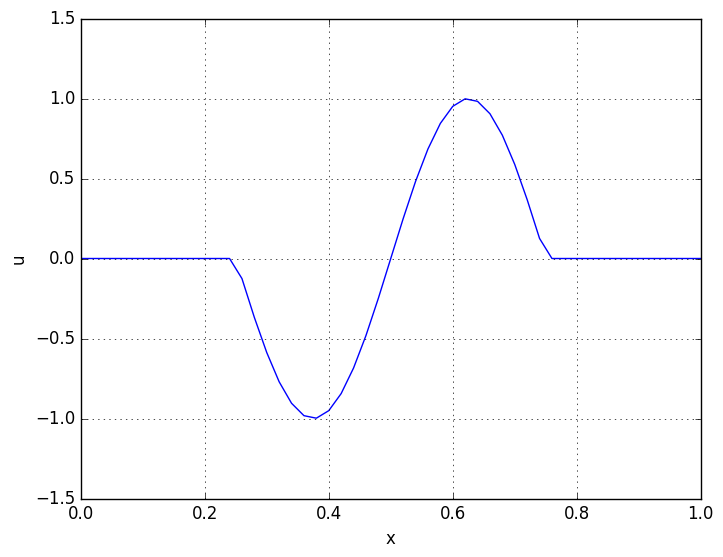

In [2]:
Nx = 51;                   # Pocet bodu site na intervalu [0,1]

x = linspace(0,1,Nx);       # Souradnice bodu site
xc = (x[1:end-1] + x[2:end]) / 2.0

function u0(x)
    """Definice pocatecni podminky"""
    if x<0.25 || x>0.75
        return 0
    else
        return sin( 2 * π * (2*x-1.0) )
    end
end
            
plot(x,[u0(xi) for xi in x]);
ylim(-1.5,1.5); grid(true); xlabel("x"); ylabel("u");

**Protiproudové (upwind) schéma**

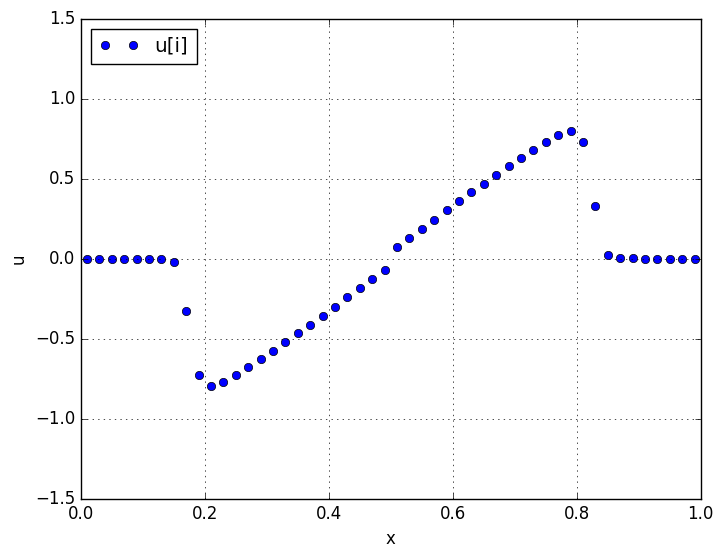

In [3]:
dx = 1.0 / (Nx-1);      # Velikost prostoroveho 
dt = 0.5 * dx / 1.0  # Velikost casoveho kroku

u    = [u0(xi) for xi in xc]
uNew = copy(u)

t = 0
Tend = 0.25;

pocet_iteraci = round(Int, Tend / dt) # Vypocet provedeme do casu priblizne Tend

function flux_upwind(ul, ur)
    if ul+ur>0
        return ul^2/2
    elseif ul+ur<0 
        return ur^2/2
    else 
        return 0
    end
end

for n = 1:pocet_iteraci

    for i = 2:Nx-2
        uNew[i] = u[i] - dt / dx * ( flux_upwind(u[i],u[i+1]) - flux_upwind(u[i-1],u[i]) )
    end
    
    t = t + dt
    u = copy(uNew)
end

u_upwind = copy(u)

#plot(x, [u0(xi) for xi in x], label="u0")
plot(xc,u, "o", label="u[i]");
ylim(-1.5,1.5); grid(true); xlabel("x"); ylabel("u"); legend(loc="upper left");


**Laxovo-Friedrichsovo (Rusanovovo) schéma**

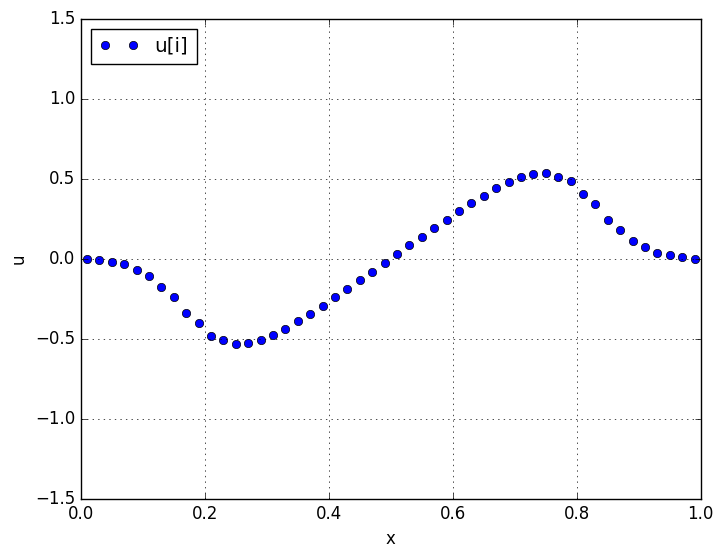

In [4]:
u    = [u0(xi) for xi in xc]
uNew = copy(u)

t = 0

function flux_lf(ul, ur)
    q = dx / dt
    return (ul^2/2 + ur^2/2)/2 - q/2*(ur - ul)
end

for n =1:pocet_iteraci

    for i = 2:Nx-2
        uNew[i] = u[i] - dt / dx * ( flux_lf(u[i],u[i+1]) - flux_lf(u[i-1],u[i]) )
    end
    
    t = t + dt
    u = copy(uNew)
end

u_lf = copy(u)

#plot(x, [u0(xi) for xi in x], label="u0")
plot(xc,u_lf, "o", label="u[i]");
ylim(-1.5,1.5); grid(true); xlabel("x"); ylabel("u"); legend(loc="upper left");


**Laxovo-Wendroffovo schéma**

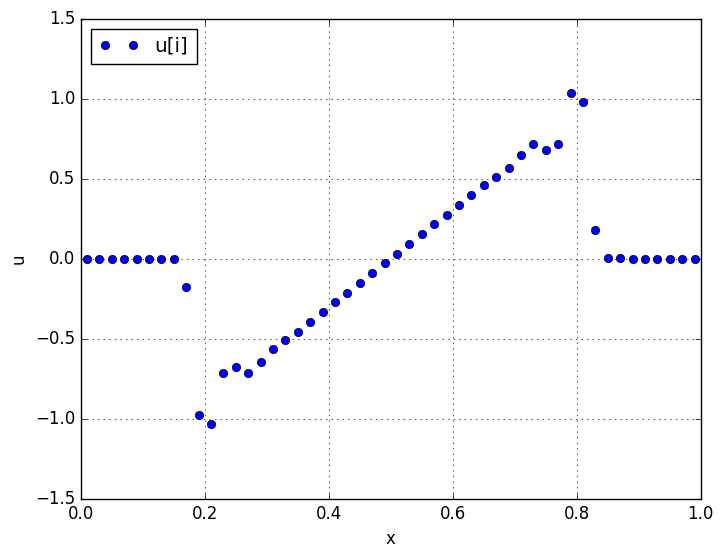

In [5]:
u    = [u0(xi) for xi in xc]
uNew = copy(u)

t = 0

function flux_lw(ul, ur)
    a = (ul + ur) / 2
    q = dt / dx * a^2
    return (ul^2/2 + ur^2/2)/2 - q/2*(ur - ul)
end

for n = 1:pocet_iteraci

    for i = 2:Nx-2
        uNew[i] = u[i] - dt / dx * ( flux_lw(u[i],u[i+1]) - flux_lw(u[i-1],u[i]) )
    end
    
    t = t + dt
    u = copy(uNew)
end

u_lw = copy(u)

#plot(x, [u0(xi) for xi in x], label="u0")
plot(xc,u_lw, "o", label="u[i]");
ylim(-1.5,1.5); grid(true); xlabel("x"); ylabel("u"); legend(loc="upper left");


**Laxovo-Wendroffovo schéma s přídavnou vazkostí**

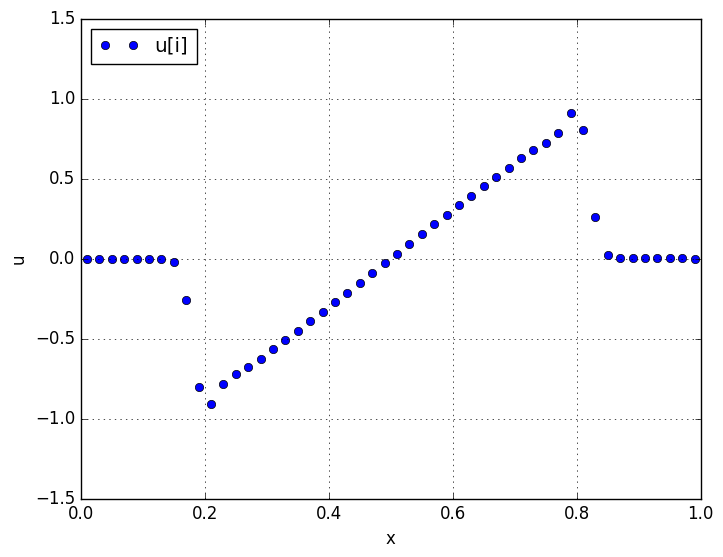

In [6]:
# Umela vazkost rizena konstantou eps

u    = [u0(xi) for xi in xc]
uNew = copy(u)

t = 0

eps = 0.05

for n = 1:pocet_iteraci     

    for i = 2:Nx-2
        uNew[i] = u[i] - dt / dx * ( flux_lw(u[i],u[i+1]) - flux_lw(u[i-1],u[i]) )
        uNew[i] = uNew[i] + eps*( (u[i-1]-u[i]) - (u[i]-u[i+1]) )
    end
    t = t + dt
    u = copy(uNew)
end

u_lwe = copy(u)

#plot(x, [u0(xi) for xi in x], label="u0")
plot(xc,u_lwe, "o", label="u[i]");
ylim(-1.5,1.5); grid(true); xlabel("x"); ylabel("u"); legend(loc="upper left");


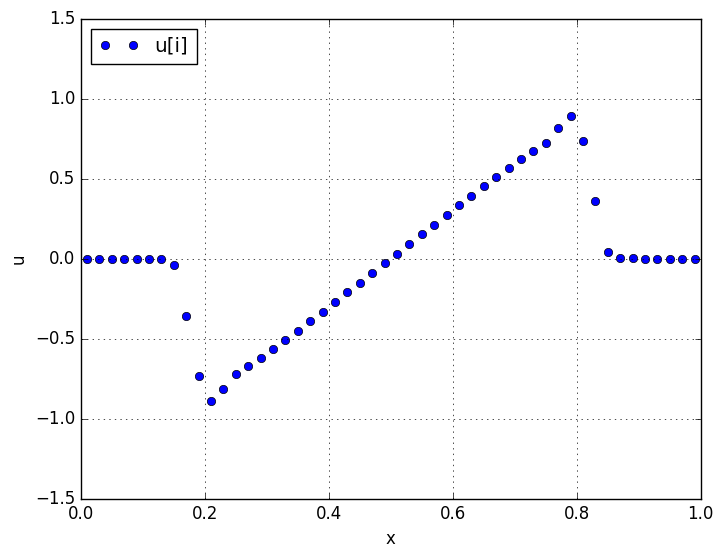

In [7]:
# Umela vazkost rizena konstantou eps s detekci "hladkosti" reseni

u    = [u0(xi) for xi in xc]
uNew = copy(u)

t = 0

eps = 0.25

for n = 1:pocet_iteraci     

    for i = 2:Nx-2
        uNew[i] = u[i] - dt / dx * ( flux_lw(u[i],u[i+1]) - flux_lw(u[i-1],u[i]) )
        
        eps_l = eps * abs(u[i-1]-u[i])
        eps_r = eps * abs(u[i]-u[i+1])
        uNew[i] = uNew[i] + eps_l*(u[i-1]-u[i]) - eps_r*(u[i]-u[i+1]) 
    end
    
    t = t + dt
    u = copy(uNew)

end

u_lwe = copy(u)

#plot(x, [u0(xi) for xi in x], label="u0")
plot(xc,u_lwe, "o", label="u[i]");
ylim(-1.5,1.5); grid(true); xlabel("x"); ylabel("u"); legend(loc="upper left");


## Řešení metodou charakteristik

"Přesné" hodnoty lze získat řešením nelineární rovnice 

$$
    0 = u - u_0(x - ut)
$$

To ovšem funguje jen v případě, že je $u$ hladké.

In [8]:
using NLsolve

In [9]:
function exact_solution(x,t)
    
    function f!(u,fu)
        fu[1] = u[1] - u0(x-u[1]*t)
    end
  
    if x>=0.5
        result = nlsolve(f!, [1.0])
    else
        result = nlsolve(f!, [-1.0])
    end
    return result.zero[1]
end

exact_solution(0.55,0.)


0.5877852522908464

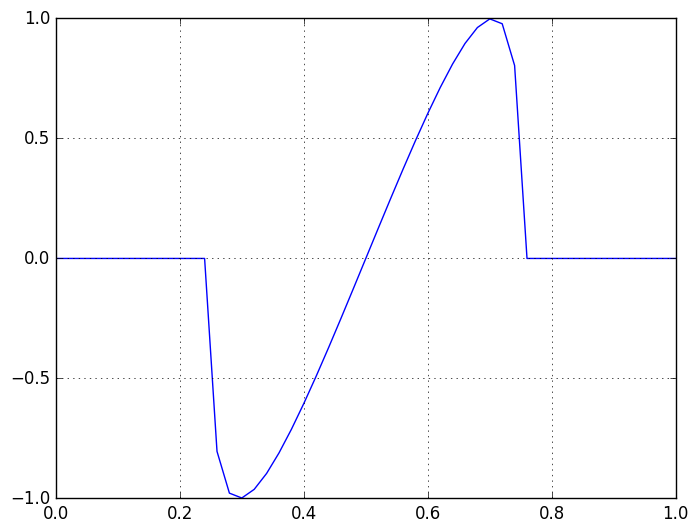

In [10]:
uex = [exact_solution(xi,0.08) for xi in x];

plot(x,uex); grid(true)

Metodu charakteristik nelze (a nebo lze jen obtížně) použít pro nespojitá řešení

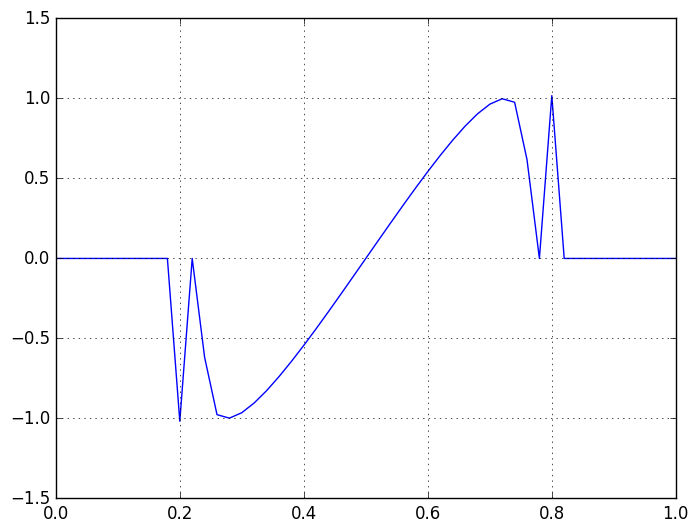

In [11]:
uex = [exact_solution(xi,0.1) for xi in x];

plot(x,uex); grid(true)